## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

## 2. Import Final Data

In [2]:
final_train_data = pd.read_csv('final_train_data.csv', sep = ',')
final_test_data = pd.read_csv('final_test_data.csv', sep = ',')

In [3]:
final_train_data.head()

,s12,s21,s20,s13,s8,s3,s7,s17,s2,s15,s4,s11,ttf_fixed
0,521.66,23.4190,39.06,2388.02,2388.06,1589.70,554.36,392,641.82,8.4195,1400.60,47.47,13.820275
1,522.28,23.4236,39.00,2388.07,2388.04,1591.82,553.75,392,642.15,8.4318,1403.14,47.49,13.784049
2,522.42,23.3442,38.95,2388.03,2388.08,1587.99,554.26,390,642.35,8.4178,1404.20,47.27,13.747727
3,522.86,23.3739,38.88,2388.08,2388.11,1582.79,554.45,392,642.35,8.3682,1401.87,47.13,13.711309
4,522.19,23.4044,38.90,2388.04,2388.06,1582.85,554.00,393,642.37,8.4294,1406.22,47.28,13.674794


In [4]:
final_test_data.head()

,s12,s21,s20,s13,s8,s3,s7,s17,s2,s15,s4,s11,ttf_fixed
0,521.72,23.3735,38.86,2388.03,2388.04,1585.29,553.90,392,643.02,8.4052,1398.21,47.20,5.477226
1,522.16,23.3916,39.02,2388.06,2388.01,1588.45,554.85,393,641.71,8.3803,1395.42,47.50,5.385165
2,521.97,23.4166,39.08,2388.03,2388.05,1586.94,554.11,393,642.46,8.4441,1401.34,47.50,5.291503
3,521.38,23.3737,39.00,2388.05,2388.03,1584.12,554.07,391,642.44,8.3917,1406.42,47.28,5.196152
4,522.15,23.4130,38.99,2388.03,2388.01,1587.19,554.16,390,642.51,8.4031,1401.92,47.31,5.099020


In [5]:
X_train = final_train_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']]
y_train = final_train_data['ttf_fixed']
X_test = final_test_data[['s12', 's21', 's20', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']]
y_test = final_test_data['ttf_fixed']                            

## 3. Prepare model

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load and preprocess sensor data
X_train = np.array(X_train)
y_train = np.array(y_train)

# Build the neural network
model = Sequential()
model.add(Dense(70, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))

#model.add(Dense(50, activation='relu'))


model.add(Dense(1))

### 3.1 Compile model

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Compile the model with the desired loss and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the model
epochs = 20
batch_size = 40
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

y_test = np.array(y_test)
X_test = np.array(X_test)


# Evaluate the model on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_pred - y_test))  # Calculate MAE
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Epoch 1/20
516/516 [==============================] - 3s 3ms/step - loss: 1922.6360 - mse: 1922.6360 - mae: 11.4963
Epoch 2/20
516/516 [==============================] - 2s 3ms/step - loss: 12.6618 - mse: 12.6618 - mae: 2.9158
Epoch 3/20
516/516 [==============================] - 2s 3ms/step - loss: 12.5226 - mse: 12.5226 - mae: 2.8951
Epoch 4/20
516/516 [==============================] - 2s 3ms/step - loss: 12.6603 - mse: 12.6603 - mae: 2.9141
Epoch 5/20
516/516 [==============================] - 2s 3ms/step - loss: 13.2396 - mse: 13.2396 - mae: 2.9659
Epoch 6/20
516/516 [==============================] - 2s 3ms/step - loss: 14.2274 - mse: 14.2274 - mae: 3.0572
Epoch 7/20
516/516 [==============================] - 2s 3ms/step - loss: 14.8836 - mse: 14.8836 - mae: 3.1209
Epoch 8/20
516/516 [==============================] - 2s 3ms/step - loss: 16.2651 - mse: 16.2651 - mae: 3.2499
Epoch 9/20
516/516 [==============================] - 2s 3ms/step - loss: 18.2864 - mse: 18.2864 - mae: 3.4

In [8]:
#evaluting the model
model.evaluate(X_test,y_test)

410/410 [==============================] - 2s 3ms/step - loss: 9.1832 - mse: 9.1832 - mae: 2.4491


[9.183207511901855, 9.183207511901855, 2.4490976333618164]

### 3.2 Retrieve weights, bias

In [9]:
weights, bias = model.layers[0].get_weights()
# Save the weights and bias to a NumPy binary file
np.save('weights.npy', weights)
np.save('bias.npy', bias)

## 4. Evaluate model

### • mae = 2.882
### • MSE = 9.18320


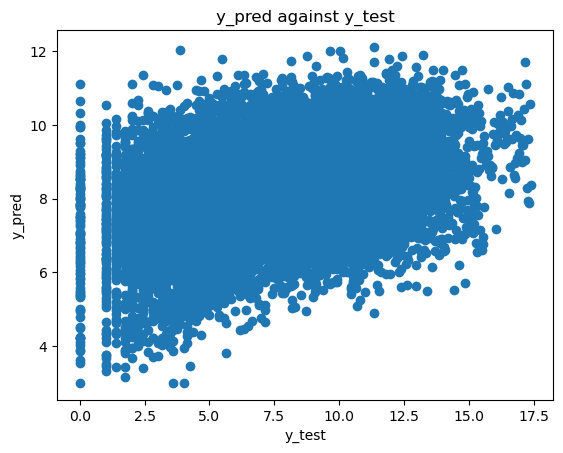

In [10]:
import matplotlib.pyplot as plt
fig = plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred against y_test')
plt.show()

## Mse is in same units as our label ttf_fixed, which brings us to the result of predicting the time to failure with an error of an average of 9.1832 cycles.